In [49]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [50]:
#Load dataset
leads = pd.read_csv(".\Documents\Lead_CaseStudy\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [51]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [52]:

leads.shape

(9240, 37)

In [53]:
#Data Cleaning
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [54]:
#Data Preparation

#Remove columns which has only one unique value
 
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [55]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 30)

In [56]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 29)

In [57]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [58]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 27)

In [59]:
#Remove rows having high missing values
leads['Lead Source'].isnull().sum()

36

In [60]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(9204, 27)

In [61]:
#Imputing with Median values because the continuous variables have outliers
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

In [62]:

leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

In [63]:
leads['Lead Quality'].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [64]:
leads['Lead Quality'].isnull().sum()

4753

In [65]:
#Creating a new category consisting on NULL/Select values for the field Lead Quality
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [66]:
#Creating a new category consisting on NULL/Select values for the field Asymmetrique Profile Index

leads['Asymmetrique Profile Index'].isnull().sum()

4201

In [67]:
leads['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [68]:
#Creating a new category consisting on NULL/Select values for the field Asymmetrique Activity Index
leads['Asymmetrique Activity Index'].isnull().sum()

4201

In [69]:
leads['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [70]:
#Creating a new category consisting on NULL/Select values for the field City
leads['City'].isnull().sum()

1420

In [71]:
leads['City'].fillna("Unknown", inplace = True)
leads['City'].value_counts()

Mumbai                         3220
Select                         2218
Unknown                        1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [72]:
#Creating a new category consisting on NULL/Select values for the field Last Activity
leads['Last Activity'].isnull().sum()

101

In [73]:
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [74]:
#Creating a new category consisting on NULL/Select values for the field Lead Profile

leads['Lead Profile'].isnull().sum()

2709

In [75]:

leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [76]:

leads['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [77]:
#Creating a new category consisting on NULL/Select values for the field What is your current occupation

In [78]:
leads['What is your current occupation'].isnull().sum()


2690

In [79]:

leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [80]:
#Creating a new category consisting on NULL/Select values for the field Specialization

leads['Specialization'].isnull().sum()

1438

In [81]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Select                               1914
Unknown                              1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [82]:
#Creating a new category consisting on NULL/Select values for the field Tags
leads['Tags'].isnull().sum()

3342

In [83]:
leads['Tags'].fillna("Unknown", inplace = True)
leads['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [84]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,596484.5,615479.0,637409.25,650513.1,655405.85,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,14.0,250.0,938.00,1380.0,1562.00,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


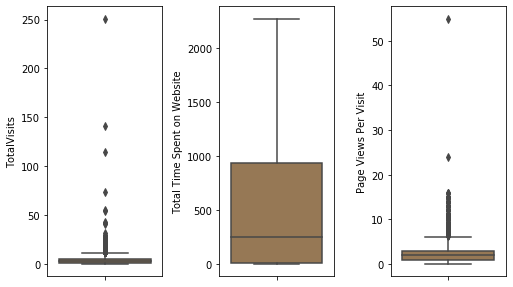

In [85]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

In [86]:
#Removing outlier values based on the Interquartile distance for some of the continuous variable
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(8575, 27)

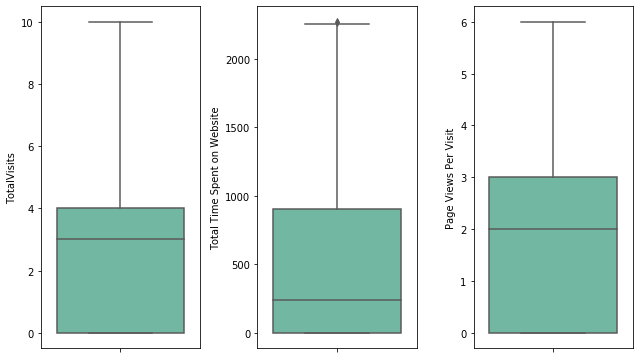

In [87]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

In [88]:
#Convert binary variables
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Select,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Select,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,0,Modified


In [89]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(8575, 102)

In [90]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Quality'
ml = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(leads['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
leads.shape

(8575, 193)

In [91]:
#reate dummies for the below categorical variables,
leads = leads.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
leads.shape

(8575, 180)

In [92]:

leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#create copy of original dataset
original_leads = leads.copy()

In [94]:
#Test-Train Split
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.0,6002.0,6002.000000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,6.130088e-17,1.427826e-16,1.538996e-17,0.001000,0.0,0.0,0.000167,0.000333,...,0.014162,0.002499,0.111629,0.063146,0.0,0.298567,0.010163,0.007331,0.000333,0.000167
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.0,0.0,0.012908,0.018253,...,0.118168,0.049933,0.314936,0.243245,0.0,0.457668,0.100308,0.085313,0.018253,0.012908
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# Check the Lead Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.04081632653061

In [101]:
#Model Building
import statsmodels.api as sm

In [102]:
#Running  First Training Model

In [103]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5838
Model Family:                Binomial   Df Model:                          163
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2019   Deviance:                          nan
Time:                        22:32:26   Pearson chi2:                 2.18e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -5.959e+15    1.1e+08  -5.43e+07      0.000   -5.96e+15   -5.96e+15
Do Not Email                                           -2.374e+14   4.68e+06  -5.08e+07      0.000   -2.37e+14   -2.37e+14
Do Not Call                                              419.0172    5.6e-06   7.49e+07      0.000     419.017     419.017
TotalVisits                                             8.271e+13   1.52e+06   5.44e+07      0.000    8.27e+13    8.27e+13
Total Time Spent on Website                             6.986e+13   1.08e+06   6.48e+07      0.000    6.99e+13    6.99e+13
Page Views Per Visit                                   -1.027e+14   1.65e+06  -6.24e+07      0.000   -1.03e+14   -1.03e+14
Search                                                  8.025e+14   2.91e+07   2.76e+07      0.000    8.03e+14    8.03e+14
Newspaper Article                                        182.1840   2.36e-06   7.72e+07      0.000     182.184     182.184
X Education Forums                                       137.3944   2.13e-06   6.46e+07      0.000     137.394     137.394
Newspaper                                              -3.609e+15   6.76e+07  -5.34e+07      0.000   -3.61e+15   -3.61e+15
Digital Advertisement                                    1.92e+14   4.86e+07   3.95e+06      0.000    1.92e+14    1.92e+14
Through Recommendations                                 2.895e+13      5e+07   5.79e+05      0.000     2.9e+13     2.9e+13
A free copy of Mastering The Interview                 -3.727e+13   2.97e+06  -1.25e+07      0.000   -3.73e+13   -3.73e+13
Country_Australia                                       1.859e+14   2.26e+07   8.22e+06      0.000    1.86e+14    1.86e+14
Country_Bahrain                                         3.025e+14    3.1e+07   9.75e+06      0.000    3.02e+14    3.02e+14
Country_Bangladesh                                      1.546e+15   4.83e+07    3.2e+07      0.000    1.55e+15    1.55e+15
Country_Belgium                                        -3.686e+15   6.77e+07  -5.44e+07      0.000   -3.69e+15   -3.69e+15
Country_Canada                                         -3.096e+15   6.77e+07  -4.57e+07      0.000    -3.1e+15    -3.1e+15
Country_China                                          -3.749e+15   4.81e+07   -7.8e+07      0.000   -3.75e+15   -3.75e+15
Country_Denmark                                         -182.2617   2.91e-06  -6.27e+07      0.000    -182.262    -182.262
Country_France                                          5.149e+14   3.99e+07   1.29e+07      0.000    5.15e+14    5.15e+14
Country_Germany                                         2.417e+15   3.96e+07    6.1e+07      0.000    2.42e+15    2.42e+15
Country_

In [104]:
#Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [105]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False,

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('Do Not Call', False, 156),
 ('TotalVisits', False, 82),
 ('Total Time Spent on Website', False, 13),
 ('Page Views Per Visit', False, 81),
 ('Search', False, 34),
 ('Newspaper Article', False, 149),
 ('X Education Forums', False, 148),
 ('Newspaper', False, 113),
 ('Digital Advertisement', False, 108),
 ('Through Recommendations', False, 126),
 ('A free copy of Mastering The Interview', False, 117),
 ('Country_Australia', False, 25),
 ('Country_Bahrain', False, 99),
 ('Country_Bangladesh', False, 42),
 ('Country_Belgium', False, 110),
 ('Country_Canada', False, 137),
 ('Country_China', False, 111),
 ('Country_Denmark', False, 157),
 ('Country_France', False, 39),
 ('Country_Germany', False, 16),
 ('Country_Ghana', False, 100),
 ('Country_Hong Kong', False, 43),
 ('Country_India', False, 12),
 ('Country_Indonesia', False, 114),
 ('Country_Italy', False, 11),
 ('Country_Kenya', False, 140),
 ('Country_Kuwait', False, 112),
 ('Country_Liberia', False, 135),

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=158)

In [110]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5981
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.7
Date:                Sun, 17 Nov 2019   Deviance:                       2529.4
Time:                        22:35:33   Pearson chi2:                 8.56e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4929      0.090    -27.836      0.000      -2.668      -2.317
Lead Source_Welingak Website                             3.2281      0.731      4.414      0.000       1.795       4.662
Lead Quality_Worst                                      -2.5504      0.761     -3.354      0.001      -4.041      -1.060
Asymmetrique Activity Index_03.Low                      -2.4592      0.358     -6.869      0.000      -3.161      -1.758
Tags_Already a student                                  -3.8785      0.726     -5.344      0.000      -5.301      -2.456
Tags_Closed by Horizzon                                  5.1421      0.722      7.120      0.000       3.727       6.558
Tags_Diploma holder (Not Eligible)                     -24.1871   2.82e+04     -0.001      0.999   -5.52e+04    5.52e+04
Tags_Interested  in full time MBA                       -3.0545      0.742     -4.117      0.000      -4.509      -1.600
Tags_Interested in other courses                        -3.0288      0.330     -9.183      0.000      -3.675      -2.382
Tags_Lost to EINS                                        6.3792      0.831      7.677      0.000       4.751       8.008
Tags_Not doing further education                        -3.7904      1.032     -3.674      0.000      -5.813      -1.768
Tags_Ringing                                            -4.2659      0.249    -17.107      0.000      -4.755      -3.777
Tags_Will revert after reading the email                 3.5963      0.194     18.561      0.000       3.217       3.976
Tags_invalid number                                    -25.7192    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_number not provided                               -25.9733    4.5e+04     -0.001      1.000   -8.82e+04    8.82e+04
Tags_opp hangup                                         -3.5152      1.063     -3.308      0.001      -5.598      -1.433
Tags_switched off                                       -5.1620      0.724     -7.126      0.000      -6.582      -3.742
Tags_wrong number given                                -26.1206   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
What is your current occupation_Unemployed               2.0649      0.119     17.357      0.000       1.832       2.298
What is your current occupation_Working Professional     2.1458      0.364      5.903      0.000       1.433       2.858
Last Activity_SMS Sent                                   2.0390      0.112     18.174      0.000       1.819       2.259
========================================================================================================================
"""

In [111]:

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.065692
7331    0.009069
7688    0.833555
92      0.076360
4908    0.076360
451     0.009069
4945    0.009069
2844    0.994975
4355    0.076360
7251    0.001051
dtype: float64

In [112]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06569164, 0.00906869, 0.83355546, 0.07635965, 0.07635965,
       0.00906869, 0.00906869, 0.99497496, 0.07635965, 0.00105118])

In [113]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.065692,8529
1,0,0.009069,7331
2,1,0.833555,7688
3,0,0.076360,92
4,0,0.076360,4908


In [114]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.065692,8529,0
1,0,0.009069,7331,0
2,1,0.833555,7688,1
3,0,0.076360,92,0
4,0,0.076360,4908,0


In [115]:
#Creating Confusion Metrics

from sklearn import metrics

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3647   89]
 [ 409 1857]]


In [117]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9170276574475175


In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.30
9,Tags_Not doing further education,1.27
15,Tags_switched off,1.20
5,Tags_Diploma holder (Not Eligible),1.12
6,Tags_Interested in full time MBA,1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
16,Tags_wrong number given,1.04


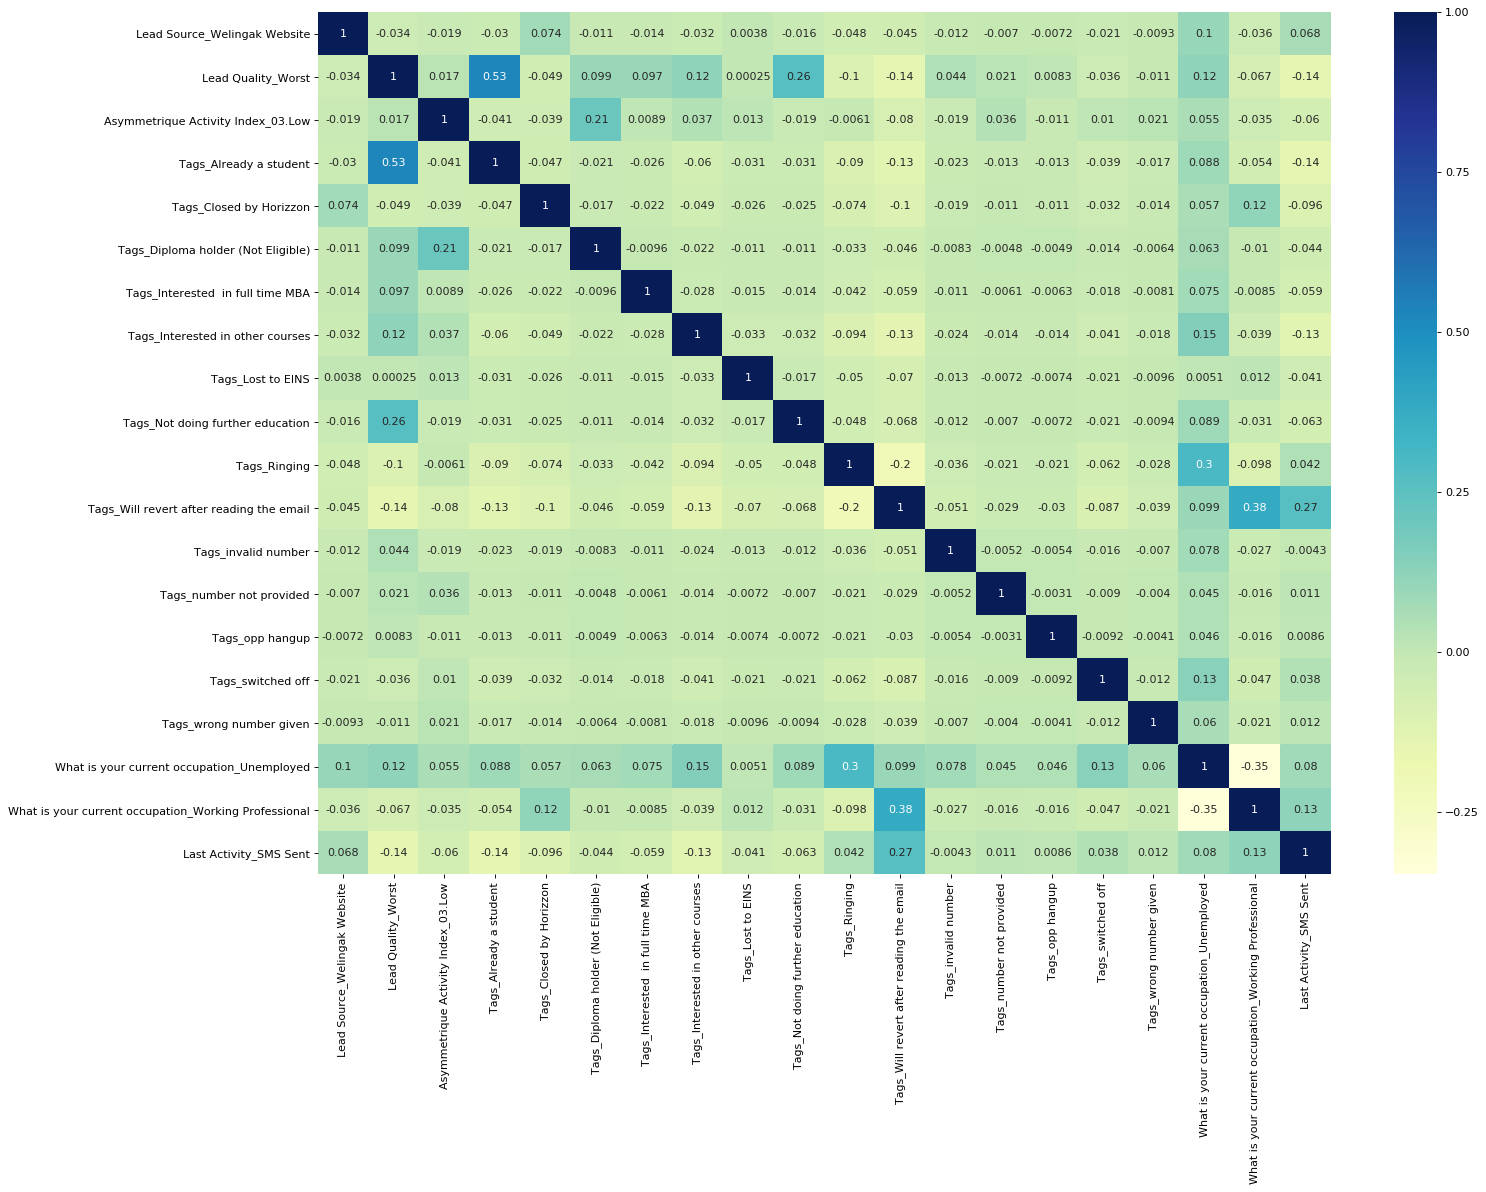

In [120]:
#there is no much multicollinearity present in model among the selected features as per their VIF values.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [121]:
#some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5982
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.7
Date:                Sun, 17 Nov 2019   Deviance:                       2557.4
Time:                        22:46:55   Pearson chi2:                 8.49e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4804      0.089    -27.881      0.000      -2.655      -2.306
Lead Source_Welingak Website                             3.2918      0.731      4.503      0.000       1.859       4.725
Lead Quality_Worst                                      -2.7112      0.739     -3.668      0.000      -4.160      -1.263
Asymmetrique Activity Index_03.Low                      -2.4342      0.357     -6.817      0.000      -3.134      -1.734
Tags_Already a student                                  -3.8015      0.724     -5.247      0.000      -5.221      -2.382
Tags_Closed by Horizzon                                  5.1851      0.722      7.184      0.000       3.770       6.600
Tags_Diploma holder (Not Eligible)                     -24.1120   2.81e+04     -0.001      0.999   -5.51e+04    5.51e+04
Tags_Interested  in full time MBA                       -2.9855      0.741     -4.028      0.000      -4.438      -1.533
Tags_Interested in other courses                        -2.9603      0.329     -8.996      0.000      -3.605      -2.315
Tags_Lost to EINS                                        6.4382      0.838      7.684      0.000       4.796       8.080
Tags_Not doing further education                        -3.7070      1.031     -3.596      0.000      -5.727      -1.687
Tags_Ringing                                            -4.1829      0.248    -16.855      0.000      -4.669      -3.696
Tags_Will revert after reading the email                 3.6368      0.193     18.834      0.000       3.258       4.015
Tags_invalid number                                    -25.6348    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_opp hangup                                         -3.4305      1.062     -3.231      0.001      -5.512      -1.349
Tags_switched off                                       -5.0770      0.724     -7.013      0.000      -6.496      -3.658
Tags_wrong number given                                -26.0375   3.49e+04     -0.001      0.999   -6.85e+04    6.84e+04
What is your current occupation_Unemployed               1.9949      0.118     16.969      0.000       1.764       2.225
What is your current occupation_Working Professional     2.1030      0.363      5.788      0.000       1.391       2.815
Last Activity_SMS Sent                                   2.0063      0.111     18.069      0.000       1.789       2.224
========================================================================================================================
"""

In [123]:

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.065249
7331    0.009300
7688    0.820658
92      0.077242
4908    0.077242
451     0.009300
4945    0.009300
2844    0.994861
4355    0.077242
7251    0.000913
dtype: float64

In [125]:
#Creating a dataframe with the actual churn flag and the predicted probabilities

In [126]:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
8529,0,0.065249,8529
7331,0,0.009300,7331
7688,1,0.820658,7688
92,0,0.077242,92
4908,0,0.077242,4908


In [127]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [128]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
8529,0,0.065249,8529,0
7331,0,0.009300,7331,0
7688,1,0.820658,7688,1
92,0,0.077242,92,0
4908,0,0.077242,4908,0


In [129]:
from sklearn import metrics

In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3641   95]
 [ 409 1857]]


In [131]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9160279906697767


In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.29
9,Tags_Not doing further education,1.27
14,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.12
5,Tags_Diploma holder (Not Eligible),1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
15,Tags_wrong number given,1.04


In [134]:
#Drop column having high VIF values as well as high p-values
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [135]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5983
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1305.1
Date:                Sun, 17 Nov 2019   Deviance:                       2610.1
Time:                        22:51:10   Pearson chi2:                 8.25e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4653      0.088    -27.969      0.000      -2.638      -2.293
Lead Source_Welingak Website                             3.4161      0.731      4.676      0.000       1.984       4.848
Lead Quality_Worst                                      -2.7568      0.728     -3.787      0.000      -4.184      -1.330
Asymmetrique Activity Index_03.Low                      -2.3688      0.357     -6.637      0.000      -3.068      -1.669
Tags_Already a student                                  -3.6760      0.724     -5.080      0.000      -5.094      -2.258
Tags_Closed by Horizzon                                  5.2742      0.721      7.314      0.000       3.861       6.687
Tags_Diploma holder (Not Eligible)                     -22.9881   1.71e+04     -0.001      0.999   -3.35e+04    3.35e+04
Tags_Interested  in full time MBA                       -2.8602      0.740     -3.866      0.000      -4.310      -1.410
Tags_Interested in other courses                        -2.8332      0.328     -8.641      0.000      -3.476      -2.191
Tags_Lost to EINS                                        6.4558      0.839      7.692      0.000       4.811       8.101
Tags_Not doing further education                        -3.5698      1.030     -3.467      0.001      -5.588      -1.552
Tags_Ringing                                            -4.0320      0.246    -16.378      0.000      -4.515      -3.550
Tags_Will revert after reading the email                 3.7184      0.192     19.386      0.000       3.342       4.094
Tags_invalid number                                    -24.4886   1.64e+04     -0.001      0.999   -3.22e+04    3.21e+04
Tags_opp hangup                                         -3.2794      1.061     -3.092      0.002      -5.358      -1.201
Tags_switched off                                       -4.9237      0.723     -6.809      0.000      -6.341      -3.506
What is your current occupation_Unemployed               1.8623      0.115     16.189      0.000       1.637       2.088
What is your current occupation_Working Professional     2.0226      0.363      5.570      0.000       1.311       2.734
Last Activity_SMS Sent                                   1.9628      0.109     17.982      0.000       1.749       2.177
========================================================================================================================
"""

In [137]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064635
7331    0.009613
7688    0.795734
92      0.078329
4908    0.078329
451     0.009613
4945    0.009613
2844    0.994720
4355    0.078329
7251    0.000879
dtype: float64

In [138]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.46349739e-02, 9.61261677e-03, 7.95733870e-01, 7.83285731e-02,
       7.83285731e-02, 9.61261677e-03, 9.61261677e-03, 9.94720023e-01,
       7.83285731e-02, 8.79091579e-04])

In [139]:
#Creating a dataframe with the actual churn flag and the predicted probabilities

In [140]:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064635,8529
1,0,0.009613,7331
2,1,0.795734,7688
3,0,0.078329,92
4,0,0.078329,4908


In [141]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064635,8529,0
1,0,0.009613,7331,0
2,1,0.795734,7688,1
3,0,0.078329,92,0
4,0,0.078329,4908,0


In [142]:

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3630  106]
 [ 409 1857]]


In [143]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.9141952682439187


In [144]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.29
9,Tags_Not doing further education,1.26
14,Tags_switched off,1.19
6,Tags_Interested in full time MBA,1.12
5,Tags_Diploma holder (Not Eligible),1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.06
13,Tags_opp hangup,1.02


In [145]:
#Drop column with high VIF and p-Values
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5984
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1313.2
Date:                Sun, 17 Nov 2019   Deviance:                       2626.4
Time:                        22:55:37   Pearson chi2:                 8.42e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4750      0.088    -28.020      0.000      -2.648      -2.302
Lead Source_Welingak Website                             3.4678      0.731      4.747      0.000       2.036       4.900
Lead Quality_Worst                                      -2.8883      0.706     -4.092      0.000      -4.272      -1.505
Asymmetrique Activity Index_03.Low                      -2.4330      0.351     -6.931      0.000      -3.121      -1.745
Tags_Already a student                                  -3.6149      0.723     -4.999      0.000      -5.032      -2.198
Tags_Closed by Horizzon                                  5.3212      0.721      7.382      0.000       3.908       6.734
Tags_Interested  in full time MBA                       -2.8081      0.740     -3.794      0.000      -4.259      -1.357
Tags_Interested in other courses                        -2.7838      0.328     -8.493      0.000      -3.426      -2.141
Tags_Lost to EINS                                        6.5606      0.846      7.757      0.000       4.903       8.218
Tags_Not doing further education                        -3.5144      1.030     -3.412      0.001      -5.533      -1.496
Tags_Ringing                                            -3.9921      0.246    -16.235      0.000      -4.474      -3.510
Tags_Will revert after reading the email                 3.7631      0.192     19.646      0.000       3.388       4.138
Tags_invalid number                                    -24.4442   1.64e+04     -0.001      0.999   -3.22e+04    3.21e+04
Tags_opp hangup                                         -3.2379      1.061     -3.052      0.002      -5.317      -1.159
Tags_switched off                                       -4.8845      0.723     -6.756      0.000      -6.302      -3.467
What is your current occupation_Unemployed               1.8184      0.114     15.893      0.000       1.594       2.043
What is your current occupation_Working Professional     1.9876      0.362      5.486      0.000       1.277       2.698
Last Activity_SMS Sent                                   1.9808      0.109     18.198      0.000       1.767       2.194
========================================================================================================================
"""

In [147]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064888
7331    0.009483
7688    0.789866
92      0.077629
4908    0.077629
451     0.009483
4945    0.009483
2844    0.994813
4355    0.077629
7251    0.000777
dtype: float64

In [148]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.48878261e-02, 9.48266404e-03, 7.89866093e-01, 7.76292105e-02,
       7.76292105e-02, 9.48266404e-03, 9.48266404e-03, 9.94812863e-01,
       7.76292105e-02, 7.76508332e-04])

In [149]:
#Creating a dataframe with the actual churn flag and the predicted probabilities

In [150]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064888,8529
1,0,0.009483,7331
2,1,0.789866,7688
3,0,0.077629,92
4,0,0.077629,4908


In [151]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064888,8529,0
1,0,0.009483,7331,0
2,1,0.789866,7688,1
3,0,0.077629,92,0
4,0,0.077629,4908,0


In [152]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3629  107]
 [ 409 1857]]


In [153]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9140286571142953


In [154]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.28
8,Tags_Not doing further education,1.25
13,Tags_switched off,1.18
5,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.08
11,Tags_invalid number,1.07
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
12,Tags_opp hangup,1.02
15,What is your current occupation_Working Profes...,0.78


In [155]:
#Drop column with high VIF and high p value
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [156]:

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5985
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.4
Date:                Sun, 17 Nov 2019   Deviance:                       2684.8
Time:                        23:01:58   Pearson chi2:                 8.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4751      0.088    -28.144      0.000      -2.647      -2.303
Lead Source_Welingak Website                             3.6135      0.730      4.949      0.000       2.182       5.044
Lead Quality_Worst                                      -3.1794      0.670     -4.742      0.000      -4.494      -1.865
Asymmetrique Activity Index_03.Low                      -2.3401      0.354     -6.605      0.000      -3.035      -1.646
Tags_Already a student                                  -3.4492      0.722     -4.776      0.000      -4.865      -2.034
Tags_Closed by Horizzon                                  5.4435      0.720      7.559      0.000       4.032       6.855
Tags_Interested  in full time MBA                       -2.6565      0.740     -3.591      0.000      -4.106      -1.207
Tags_Interested in other courses                        -2.6347      0.327     -8.060      0.000      -3.275      -1.994
Tags_Lost to EINS                                        6.7102      0.862      7.786      0.000       5.021       8.399
Tags_Not doing further education                        -3.3472      1.030     -3.250      0.001      -5.366      -1.329
Tags_Ringing                                            -3.8360      0.244    -15.709      0.000      -4.315      -3.357
Tags_Will revert after reading the email                 3.8695      0.190     20.331      0.000       3.497       4.243
Tags_opp hangup                                         -3.0789      1.061     -2.903      0.004      -5.158      -1.000
Tags_switched off                                       -4.7274      0.722     -6.544      0.000      -6.143      -3.311
What is your current occupation_Unemployed               1.6711      0.112     14.926      0.000       1.452       1.891
What is your current occupation_Working Professional     1.8944      0.363      5.221      0.000       1.183       2.606
Last Activity_SMS Sent                                   1.9687      0.107     18.383      0.000       1.759       2.179
========================================================================================================================
"""

In [157]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064688
7331    0.009566
7688    0.762190
92      0.077626
4908    0.077626
451     0.009566
4945    0.009566
2844    0.994819
4355    0.077626
7251    0.000591
dtype: float64

In [158]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.46881585e-02, 9.56568869e-03, 7.62190244e-01, 7.76256984e-02,
       7.76256984e-02, 9.56568869e-03, 9.56568869e-03, 9.94818870e-01,
       7.76256984e-02, 5.91337209e-04])

In [159]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064688,8529
1,0,0.009566,7331
2,1,0.762190,7688
3,0,0.077626,92
4,0,0.077626,4908


In [160]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064688,8529,0
1,0,0.009566,7331,0
2,1,0.762190,7688,1
3,0,0.077626,92,0
4,0,0.077626,4908,0


In [161]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3620  116]
 [ 409 1857]]


In [162]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.9125291569476841


In [163]:
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.26
8,Tags_Not doing further education,1.23
12,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.08
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
11,Tags_opp hangup,1.02
14,What is your current occupation_Working Profes...,0.77
1,Lead Quality_Worst,0.67


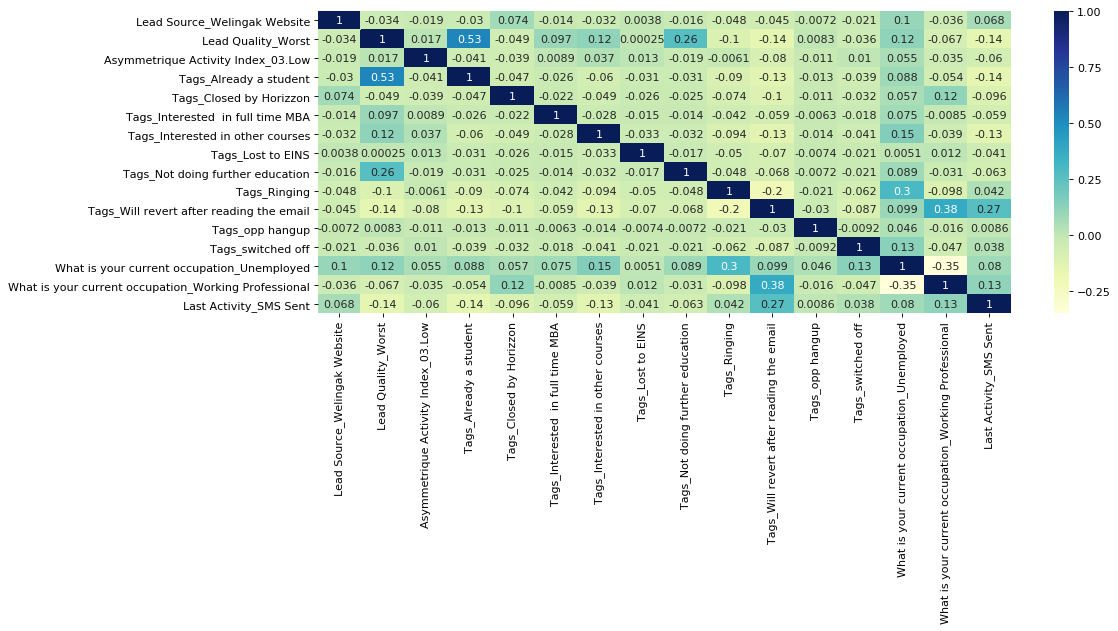

In [164]:
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [165]:
#All variables have p-value < 0.05.
#All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
#The overall accuracy of 0.9125 at a probability threshold of 0.05 is also very acceptable.

In [166]:
#So we need not drop any more variables and we can proceed with making predictions using this model only

In [167]:
#Metrics beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8195057369814651

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.9689507494646681

In [170]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.031049250535331904


In [171]:
# positive predictive value 
print (TP / float(TP+FP))

0.941206284845413


In [172]:

# Negative predictive value
print (TN / float(TN+ FN))

0.8984859766691486


In [173]:
#Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [174]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


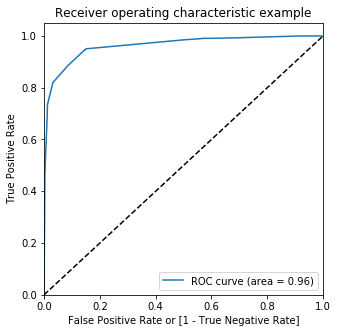

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67665953e-04,
        2.67665953e-04, 2.67665953e-04, 5.35331906e-04, 8.02997859e-04,
        8.02997859e-04, 2.14132762e-03, 2.14132762e-03, 2.40899358e-03,
        2.40899358e-03, 2.67665953e-03, 2.67665953e-03, 2.67665953e-03,
        2.67665953e-03, 2.67665953e-03, 4.55032120e-03, 1.15096360e-02,
        1.15096360e-02, 1.15096360e-02, 1.15096360e-02, 1.15096360e-02,
        1.15096360e-02, 1.17773019e-02, 1.17773019e-02, 1.20449679e-02,
        1.20449679e-02, 3.07815846e-02, 3.07815846e-02, 3.07815846e-02,
        3.10492505e-02, 3.10492505e-02, 3.13169165e-02, 8.61884368e-02,
        8.69914347e-02, 1.45610278e-01, 1.45610278e-01, 1.45877944e-01,
        1.48019272e-01, 1.48019272e-01, 1.51498929e-01, 1.52301927e-01,
        1.53640257e-01, 1.55513919e-01, 1.56584582e-01, 1.573875

In [175]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [176]:
#Calculate area under curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [177]:
auc = auc_val(fpr,tpr)
auc

0.9623860234430959

In [178]:
#optimal cutoff probability
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0


In [179]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.884039  0.951015  0.843415
0.2   0.2  0.888204  0.947926  0.851981
0.3   0.3  0.889037  0.946161  0.854390
0.4   0.4  0.912363  0.819506  0.968683
0.5   0.5  0.912529  0.819506  0.968951
0.6   0.6  0.912363  0.819064  0.968951
0.7   0.7  0.911863  0.817299  0.969218
0.8   0.8  0.892203  0.734334  0.987955
0.9   0.9  0.885205  0.715357  0.988223


In [180]:
#accurate sensitivity and specificity for various probabilities

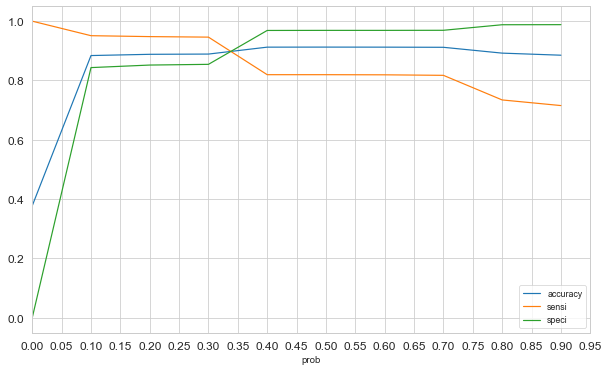

In [181]:

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [182]:
#From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [183]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [184]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9031989336887704

In [185]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3411,  325],
       [ 256, 2010]], dtype=int64)

In [186]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [187]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8870255957634599

In [188]:
# Let us calculate specificity
TN / float(TN+FP)

0.9130085653104925

In [189]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0869914346895075


In [190]:
# Positive predictive value 
print (TP / float(TP+FP))

0.860813704496788


In [191]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9301881647122989


In [192]:
#Precision = TP / TP + FP
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.860813704496788

In [193]:
#Recall = TP / TP + FN
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8870255957634599

In [194]:
from sklearn.metrics import precision_score, recall_score

In [195]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.860813704496788

In [196]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8870255957634599

In [197]:
#precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5972    0
 5973    0
 5974    1
 5975    1
 5976    0
 5977    0
 5978    1
 5979    1
 5980    0
 5981    0
 5982    1
 5983    0
 5984    0
 5985    0
 5986    1
 5987    0
 5988    1
 5989    1
 5990    0
 5991    1
 5992    0
 5993    0
 5994    0
 5995    0
 5996    1
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [198]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)



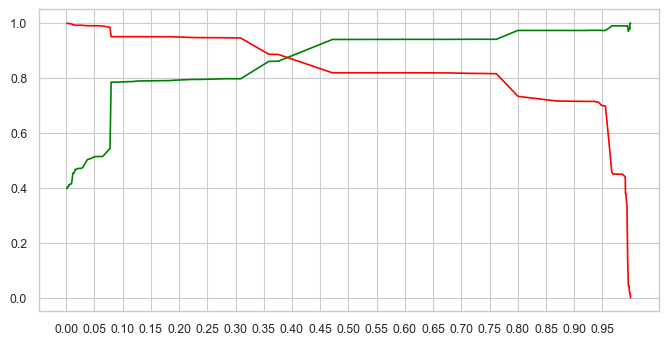

In [199]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [200]:
#From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80%

In [202]:
#This is already achieved with our earlier threshold value of 0.33. So we will stick to this value.

In [203]:
#calculating F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8737231036731146

In [204]:
#predictions for test dataset using scaler function from train dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7073,0,0,0.969969,-0.615211,1.785283,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,1,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
440,0,0,1.403911,-0.094170,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
X_test = X_test[col]
X_test.head()


,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
6190,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [206]:
X_test_sm = sm.add_constant(X_test)

In [207]:
y_test_pred = res.predict(X_test_sm)

In [208]:
y_test_pred[:10]

6190    0.000591
7073    0.077626
4519    0.309185
607     0.999825
440     0.077626
4247    0.077626
7431    0.008041
726     0.376039
7300    0.008041
4046    0.077626
dtype: float64

In [209]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [210]:
# Let's see the head
y_pred_1.head()

,0
6190,0.000591
7073,0.077626
4519,0.309185
607,0.999825
440,0.077626


In [211]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [212]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [213]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [214]:

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [215]:

y_pred_final.head()

,Converted,LeadID,0
0,0,6190,0.000591
1,0,7073,0.077626
2,0,4519,0.309185
3,1,607,0.999825
4,0,440,0.077626


In [216]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [217]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [218]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,6190,0,0.000591
1,7073,0,0.077626
2,4519,0,0.309185
3,607,1,0.999825
4,440,0,0.077626


In [220]:
#Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert

In [221]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()


,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [222]:
#overall accuracy
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9055577147298873

In [223]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)


[[1445  132]
 [ 111  885]]


In [224]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [225]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8885542168674698

In [226]:
# Let us calculate specificity
TN / float(TN+FP)

0.9162967660114141

In [227]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08370323398858592


In [228]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8702064896755162


In [229]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9286632390745502


In [230]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8702064896755162

In [231]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8885542168674698

In [232]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.879284649776453

In [233]:
#Calculating Lead score for the entire dataset
#Lead Score = 100 * ConversionProbability
#his needs to be calculated for all the leads from the original dataset (train + test)
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [234]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [235]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


In [236]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


In [237]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [238]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [239]:

# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,8529,0,0.064688,0,6
1,7331,0,0.009566,0,1
2,7688,1,0.762190,1,76
3,92,0,0.077626,0,8
4,4908,0,0.077626,0,8


In [240]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.031109,0,3
1,0,0.009566,0,1
2,1,0.801308,1,80
3,0,0.009566,0,1
4,1,0.955452,1,96


In [241]:

# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()


,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [243]:
#Concatenating the 2 dataframes based on index.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.031109,0,3
1,660728,0,0.009566,0,1
2,660727,1,0.801308,1,80
3,660719,0,0.009566,0,1
4,660681,1,0.955452,1,96
5,660680,0,0.077626,0,8
6,660673,1,0.955452,1,96
7,660664,0,0.077626,0,8
8,660624,0,0.077626,0,8
9,660616,0,0.077626,0,8


In [244]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            3.61
Lead Quality_Worst                                     -3.18
Asymmetrique Activity Index_03.Low                     -2.34
Tags_Already a student                                 -3.45
Tags_Closed by Horizzon                                 5.44
Tags_Interested  in full time MBA                      -2.66
Tags_Interested in other courses                       -2.63
Tags_Lost to EINS                                       6.71
Tags_Not doing further education                       -3.35
Tags_Ringing                                           -3.84
Tags_Will revert after reading the email                3.87
Tags_opp hangup                                        -3.08
Tags_switched off                                      -4.73
What is your current occupation_Unemployed              1.67
What is your current occupation_Working Professional    1.89
Last Activity_SMS Sent                                  1.97
dtype: float64

In [245]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                            53.85
Lead Quality_Worst                                     -47.38
Asymmetrique Activity Index_03.Low                     -34.87
Tags_Already a student                                 -51.40
Tags_Closed by Horizzon                                 81.12
Tags_Interested  in full time MBA                      -39.59
Tags_Interested in other courses                       -39.26
Tags_Lost to EINS                                      100.00
Tags_Not doing further education                       -49.88
Tags_Ringing                                           -57.17
Tags_Will revert after reading the email                57.67
Tags_opp hangup                                        -45.88
Tags_switched off                                      -70.45
What is your current occupation_Unemployed              24.90
What is your current occupation_Working Professional    28.23
Last Activity_SMS Sent                                  29.34
dtype: f

In [246]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                            12
Lead Quality_Worst                                       9
Asymmetrique Activity Index_03.Low                       3
Tags_Already a student                                   8
Tags_Closed by Horizzon                                  1
Tags_Interested  in full time MBA                       11
Tags_Interested in other courses                         5
Tags_Lost to EINS                                        6
Tags_Not doing further education                         2
Tags_Ringing                                            13
Tags_Will revert after reading the email                14
Tags_opp hangup                                         15
Tags_switched off                                        0
What is your current occupation_Unemployed              10
What is your current occupation_Working Professional     4
Last Activity_SMS Sent                                   7
dtype: int64

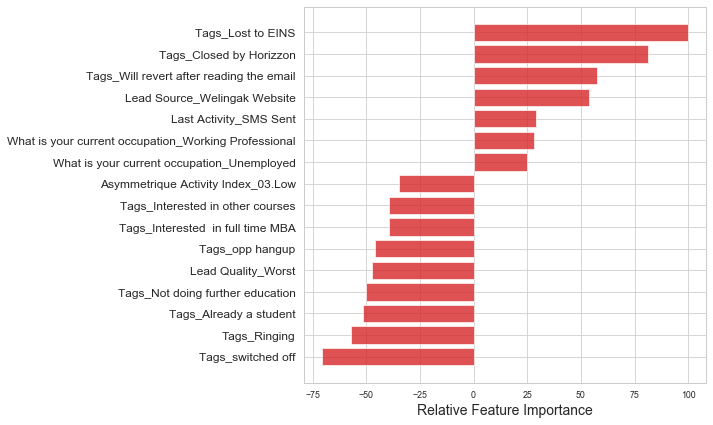

In [247]:
#Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()